In [6]:
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt
import numpy as np
from pylab import *
import config
from utils import *
from solver import *
import numpy as np
import sys
import os
import time

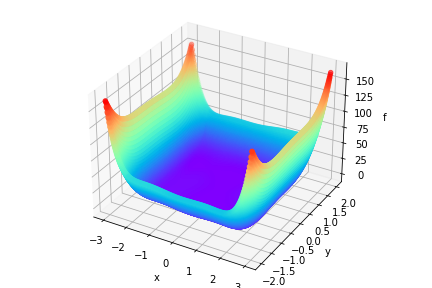

In [12]:
%matplotlib widget

def six_hump_camel_function(x1, x2):
    y = (4 - 2.1 * (x1 ** 2) + (x1 ** 4) / 3) * (x1 ** 2) + x1 * x2 + (-4 + 4 * (x2 ** 2)) * (x2 ** 2)
    return y

x = np.linspace(-3, 3, 200)
y = np.linspace(-2, 2, 200)
X,Y = np.meshgrid(x, y)
Z = six_hump_camel_function(X, Y)

# creating figure
fig = plt.figure()
ax = Axes3D(fig, auto_add_to_figure=False)
fig.add_axes(ax)

colmap = cm.ScalarMappable(cmap=cm.rainbow)
colmap.set_array(Z)

plot_geeks = ax.scatter(X, Y, Z, c=cm.rainbow(Z.reshape(-1)/max(Z.reshape(-1))))

# setting title and labels
ax.set_title("3D plot")
ax.set_xlabel('x')
ax.set_ylabel('y')
ax.set_zlabel('f')

# displaying the plot
plt.show()

Enter your name: Daolang
Start active learning with preference data
Acquisition time: 1
point 0: [-0.90, 0.88] point 1: [0.79, -0.60]


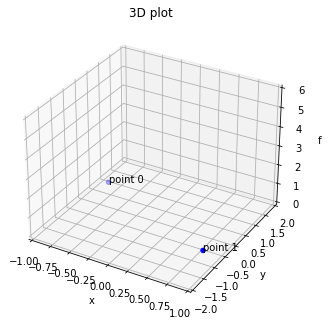

Which point do you think is larger? (0 or 1):0
How biased our expert is: 100.00%
Expert surrogate model accuracy (compared with f) 0.543

Acquisition time: 2
point 0: [-0.94, -0.04] point 1: [-0.97, 1.64]


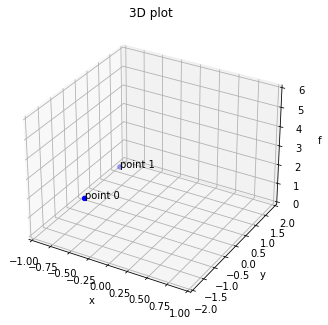

KeyboardInterrupt: Interrupted by user

In [16]:
%matplotlib inline

n_train_pairs = 1
n_query_pairs = 2000
n_test_pairs = 1000
n_acquire_al = 20
n_acquire_bo = 50
seed = 1
name = input("Enter your name: ")

# fetch the data
train_al, query_al, test_al, query_bo = get_al_data(config.dataset, n_train_pairs, n_query_pairs, n_test_pairs, seed)


model, train_al = apl_nn(train_al, query_al, test_al, n_acquire_al, "BALD_nn")
np.save("Sim/{}.npy".format(name), train_al)
# initialize the BO output layers using expert output layer
model.fc5.load_state_dict(model.fc4.state_dict())

In [7]:
# min_nn = np.zeros((2, n_acquire_bo))

min_nn = bo_nn(model, query_bo, n_acquire_bo, "EI_nn", train_al=train_al)

print('Saving results...')
root_name = 'Sim/' + config.dataset
if not os.path.exists(root_name):
    os.mkdir(root_name)
np.save(root_name + '/nn_' + str(seed) + '.npy', min_nn)
print(min_nn)

Start Bayesian optimization with utility function
1 query of Bayesian optimization, min value -0.6730722526348453
2 query of Bayesian optimization, min value -0.6730722526348453
3 query of Bayesian optimization, min value -0.6730722526348453
4 query of Bayesian optimization, min value -0.6730722526348453
5 query of Bayesian optimization, min value -0.6730722526348453
6 query of Bayesian optimization, min value -0.7549036761650811
7 query of Bayesian optimization, min value -0.7549036761650811
8 query of Bayesian optimization, min value -0.7549036761650811
9 query of Bayesian optimization, min value -0.7549036761650811
10 query of Bayesian optimization, min value -0.7549036761650811
11 query of Bayesian optimization, min value -0.7549036761650811
12 query of Bayesian optimization, min value -0.7549036761650811
13 query of Bayesian optimization, min value -0.7549036761650811
14 query of Bayesian optimization, min value -0.7549036761650811
15 query of Bayesian optimization, min value -0.7